#  Baseline Model

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import log
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import os
! pwd
import sys
sys.path.append('../Library')

from data_prep import PreProcessor1

import library_leo as leo



/Users/leonardodicaterina/Documents/GitHub/Machine_Learning_G19/Notebooks


In [259]:
train_path = "../Data/train_data.csv"
test_path = "../Data/test_data.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, dtype=dtype,index_col='Claim Identifier')
dtest = pd.read_csv(test_path, dtype=dtype,index_col='Claim Identifier')

In [260]:
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
train = train.drop(columns=['Claim Injury Type'])
y_str = y.str[:1]
y_int = y_str.astype(int)

In [261]:
y_int = y_str.astype(int)
# partition the data X, y and y_2bin
X_train, X_valid, y_train,y_valid = train_test_split(
    train, y_int, test_size=0.2, random_state=0)

In [262]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------transformation---------------------")
pr.set_transformations(df_train)
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
df_train= pr.scaling_pipeline(df_train)
df_train = df_train.drop(columns=['Agreement Reached', 'WCB Decision'])
df_train.info() 

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (459220, 26)
------------fillna---------------------
extended fillna_list: [('Age at Injury', 'median'), ('Average Weekly Wage', 'median'), ('Birth Year', 'median'), ('IME-4 Count', 'median'), ('Industry Code', 'median'), ('WCIO Cause of Injury Code', 'median'), ('WCIO Nature of Injury Code', 'median'), ('WCIO Part Of Body Code', 'median'), ('Zip Code', 'median'), ('Agreement Reached', 'median'), ('Number of Dependents', 'median'), ('Accident Date', 'mode'), ('Alternative Dispute Resolution', 'mode'), ('Assembly Date', 'mode'), ('Attorney/Representative', 'mode'), ('C-2 Date', 'mode'), ('C-3 Date', 'mode'), ('Carrier Name', '

In [263]:
pr.update_status('valid')
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_valid)
print("------------pipeline---------------------")
df_valid = pr.cast_pipeline(X_valid)
print("df after cast_pipeline:", df_valid.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_valid)   
df_valid = pr.fillna_pipeline(df_valid)
print("df after fillna_pipeline:", df_valid.shape)
print("------------transformation---------------------")
pr.set_transformations(df_valid)
df_valid = pr.transformation_pipeline(df_valid)
print("df after transformation_pipeline:", df_valid.shape)
df_valid = pr.scaling_pipeline(df_valid)
df_valid = df_valid.drop(columns=['Agreement Reached', 'WCB Decision'])

df_valid.info()

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Feature Carrier Type is already in scaling list
Feature Zip Code is already in scaling list
'Industry Code Description'
-Column Industry Code Description not found
"['Industry Code Description'] not found in axis"
-Column Industry Code Description not found
"['OIICS Nature of Injury Description'] not found in axis"
-Column OIICS Nature of Injury Description not found
"['WCIO Cause of Injury Description'] not found in axis"
-Column WCIO Cause of Injury Description not found
"['WCIO Nature of Injury Description'] not found in axis"
-Column WCIO Nature of Injury Description not found
"['WCIO Part Of Body Description'] not found in axis"
-Column WCIO Part Of Body Description not found
'Industry Code Description'
-Column Industry Code Description not found
df after cast_pipeline: (114806, 26)
------------fillna----

# feature selection

In [264]:
num_features = df_train.select_dtypes(include=[np.number]).columns
obj_features = df_train.select_dtypes(include=[object,'string']).columns


In [265]:
obj_features

Index(['Carrier Name', 'Carrier Type', 'County of Injury', 'District Name',
       'Gender', 'Medical Fee Region'],
      dtype='object')

## correlation with target

### Linear correlation


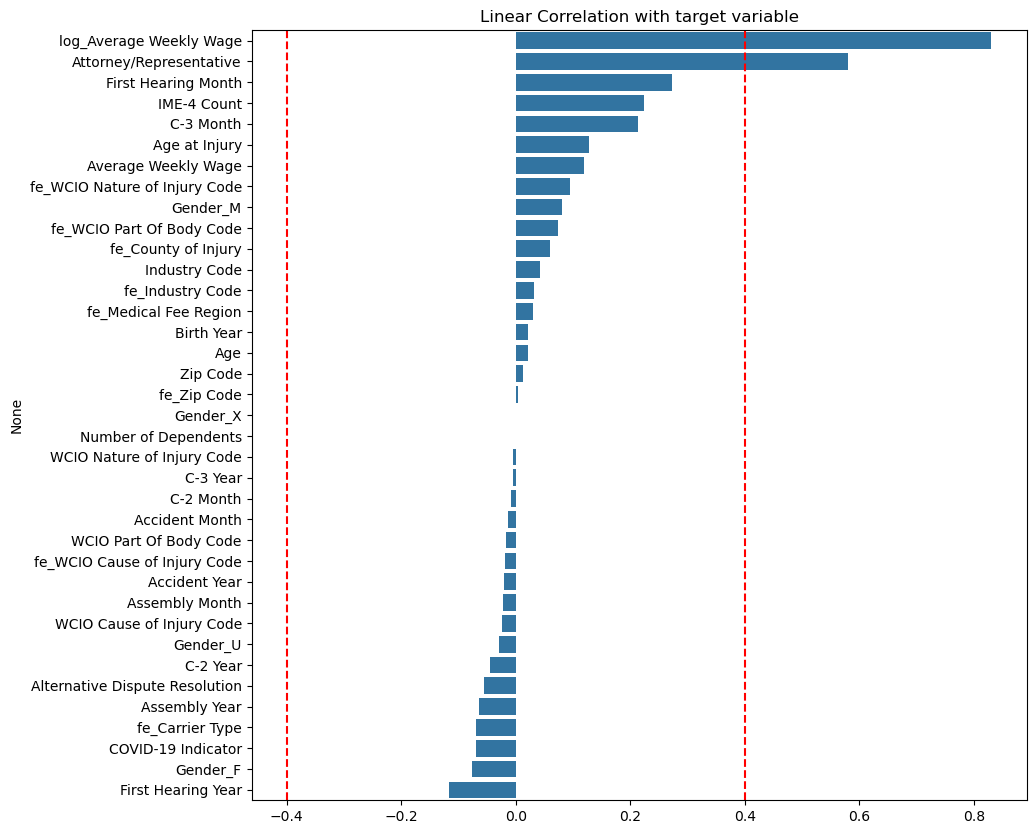

In [290]:
corr_y = df_train[num_features].corrwith(y_train)
corr_y = corr_y.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=corr_y.values, y=corr_y.index)
plt.title('Linear Correlation with target variable')
plt.axvline(x=0.4, color='r', linestyle='--')
plt.axvline(x=-0.4, color='r', linestyle='--')

plt.show()

### entropy correlation

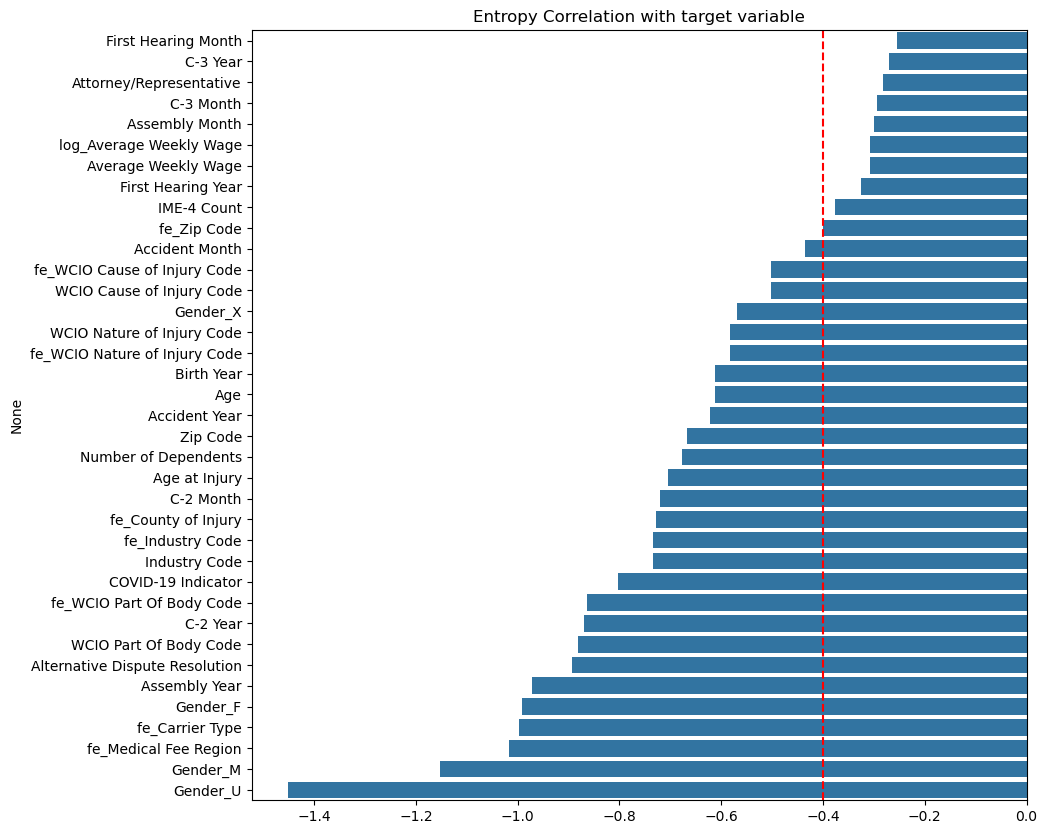

In [291]:
s_corr_y = []
for col in num_features:
    s_col = leo.two_col_entropy_corr(df_train[col], y_train)
    s_col = log((s_col +1)/2)
    s_corr_y.append(s_col)
    
s_corr_y = pd.Series(s_corr_y, index=num_features).sort_values(ascending=False)
s_corr_y = s_corr_y.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x=s_corr_y.values, y=s_corr_y.index)
plt.title('Entropy Correlation with target variable')
# vertical line at 0.5
plt.axvline(x=-0.4, color='r', linestyle='--')
plt.show()  

### chi2 correlation for categorical features

In [268]:
from scipy.stats import chi2_contingency

Text(0.5, 0, 'x')

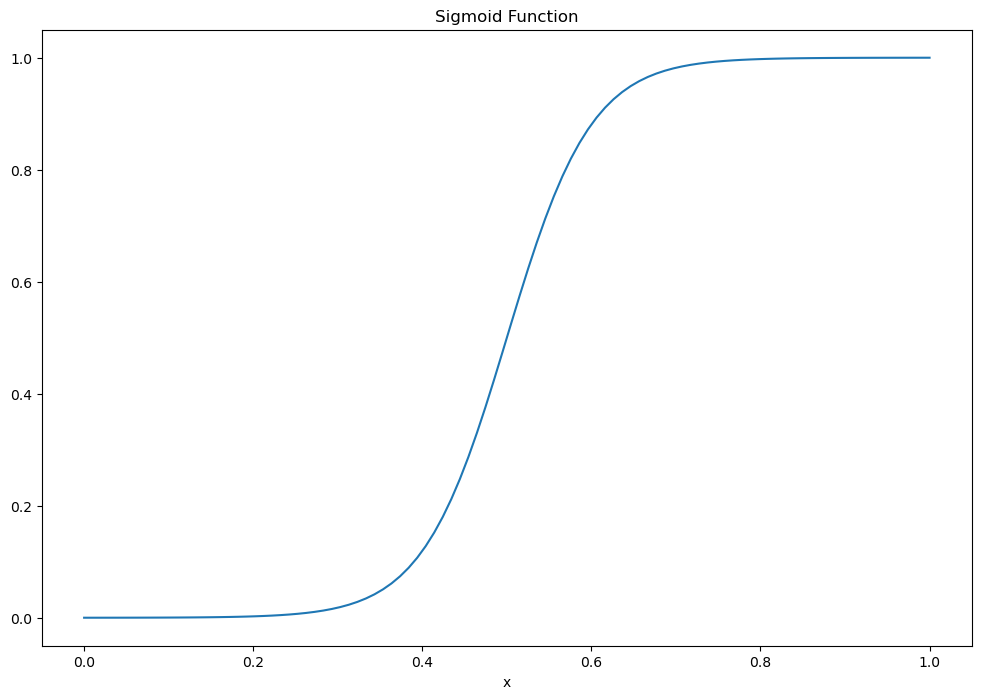

In [ ]:
def sigmoid(x, a=20):
    return 1 / (1 + np.exp(-a * (x - 0.5)))

plt.figure(figsize=(12, 8))
x = np.linspace(0, 1, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')

In [270]:
def chi2_feature_importance(f1, target, significance_level=0.05, log=False):
    """
    Evaluate if a feature is important to predict the target using the Chi-squared test.

    Parameters:
        data (pd.DataFrame): The dataset containing the feature and target.
        feature (str): The name of the feature column.
        target (str): The name of the target column.
        significance_level (float): The threshold for statistical significance (default 0.05).

    Returns:
        dict: A dictionary containing the chi-squared statistic, p-value, and whether the feature is important.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(f1, target)

    # Perform the Chi-squared test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    total_observations = contingency_table.sum().sum()
    rows, cols = contingency_table.shape

    cramers_v = np.sqrt(
        chi2_stat / (total_observations * min(cols - 1, rows - 1)))

    is_important = p_value < significance_level

    if log:
        if cramers_v < 0.3:
            print(f" {is_important} the test is not significant {cramers_v}")
        elif cramers_v < 0.5:
            print(f" {is_important} the test is weakly significant {cramers_v}")
        elif cramers_v < 0.7:
            print(f" {is_important} the test is moderately significant {cramers_v}")
        elif cramers_v < 1:
            print(f" {is_important} the test is highly significant {cramers_v}")
        else:
            print(f"the test has no sense {cramers_v}")

    # Determine if the feature is important
    is_important = p_value < significance_level
    return cramers_v, p_value

In [271]:
df_train[col]

Claim Identifier
5877274   -0.231530
5482355    0.652579
5654730   -0.172972
6029178    0.652579
6108114    0.946111
             ...   
5875495    0.000000
5598826   -0.453838
5550948    0.946111
5979080    0.946111
5803696    0.000000
Name: fe_Industry Code, Length: 459220, dtype: float64

Feature: Carrier Name
 True the test is not significant 0.17967855166562294
normalized score: 0.0016481884309286975
--------------------------------------------------
Feature: Carrier Type
 True the test is not significant 0.07391030145791992
normalized score: 0.0001990423318525383
--------------------------------------------------
Feature: County of Injury
 True the test is not significant 0.05281645688474296
normalized score: 0.0001305438444708365
--------------------------------------------------
Feature: District Name
 True the test is not significant 0.04254892166975126
normalized score: 0.00010631247906415608
--------------------------------------------------
Feature: Gender
 True the test is not significant 0.05694748450718718
normalized score: 0.00014178593952807983
--------------------------------------------------
Feature: Medical Fee Region
 True the test is not significant 0.03938747030070117
normalized score: 9.979919925605135e-05
------------------------------------------

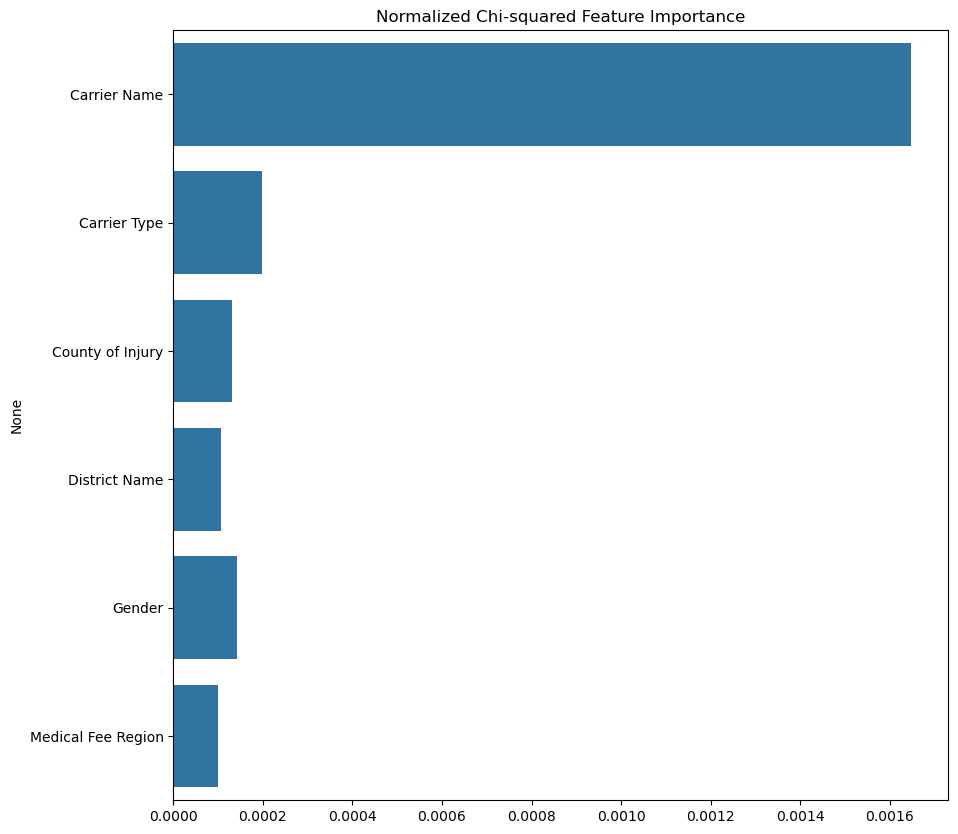

In [272]:
normalized_scores = []
 
for col in obj_features:
    print(f"Feature: {col}")
    cramers_v, p_value = chi2_feature_importance(df_train[col], y_train, log=True)
    normalized_scores.append((1 - p_value)*sigmoid(cramers_v))
    print(f'normalized score: {normalized_scores[-1]}')
    print("-"*50)

plt.figure(figsize=(10, 10))
sns.barplot(x=normalized_scores, y=obj_features)
plt.title('Normalized Chi-squared Feature Importance')
plt.show()

### best features level 1

In [273]:
best_lin = list((corr_y [corr_y.abs() > 0.3]).index)
best_ent = list((s_corr_y [s_corr_y > - 0.4]).index)
best_chi2 = list((pd.Series(normalized_scores, index=obj_features)[pd.Series(normalized_scores, index=obj_features) > 0.5]).index)

In [274]:
bestnum = set(best_lin + best_ent)
bestnum = list(bestnum)
bestnum

['C-3 Year',
 'Average Weekly Wage',
 'log_Average Weekly Wage',
 'First Hearing Month',
 'Assembly Month',
 'IME-4 Count',
 'Attorney/Representative',
 'First Hearing Year',
 'C-3 Month']

In [275]:
best_chi2

[]

## correlation between features

### Linear correlation

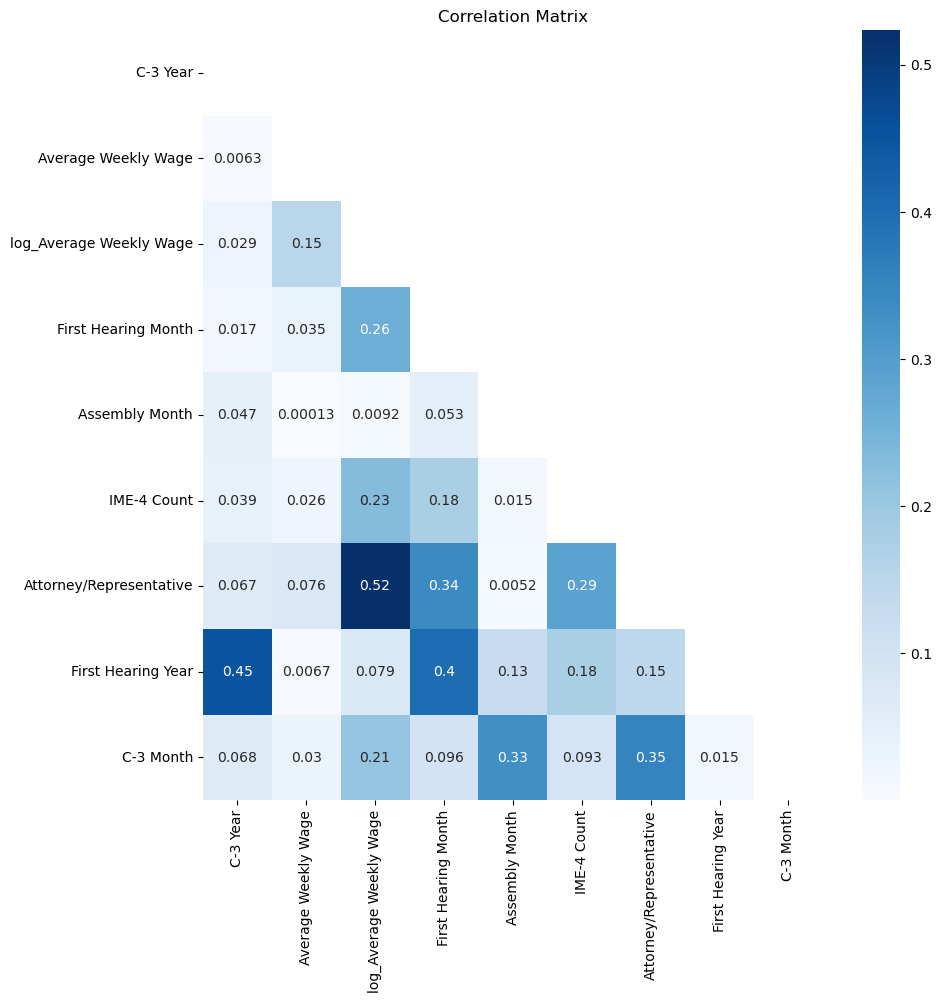

In [276]:
# correlation between numerical features
corr = df_train[bestnum].corr()
#half of the matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(np.abs(corr), annot=True, cmap='Blues', mask=mask)
plt.title('Correlation Matrix')
plt.show()


### entropy correlation

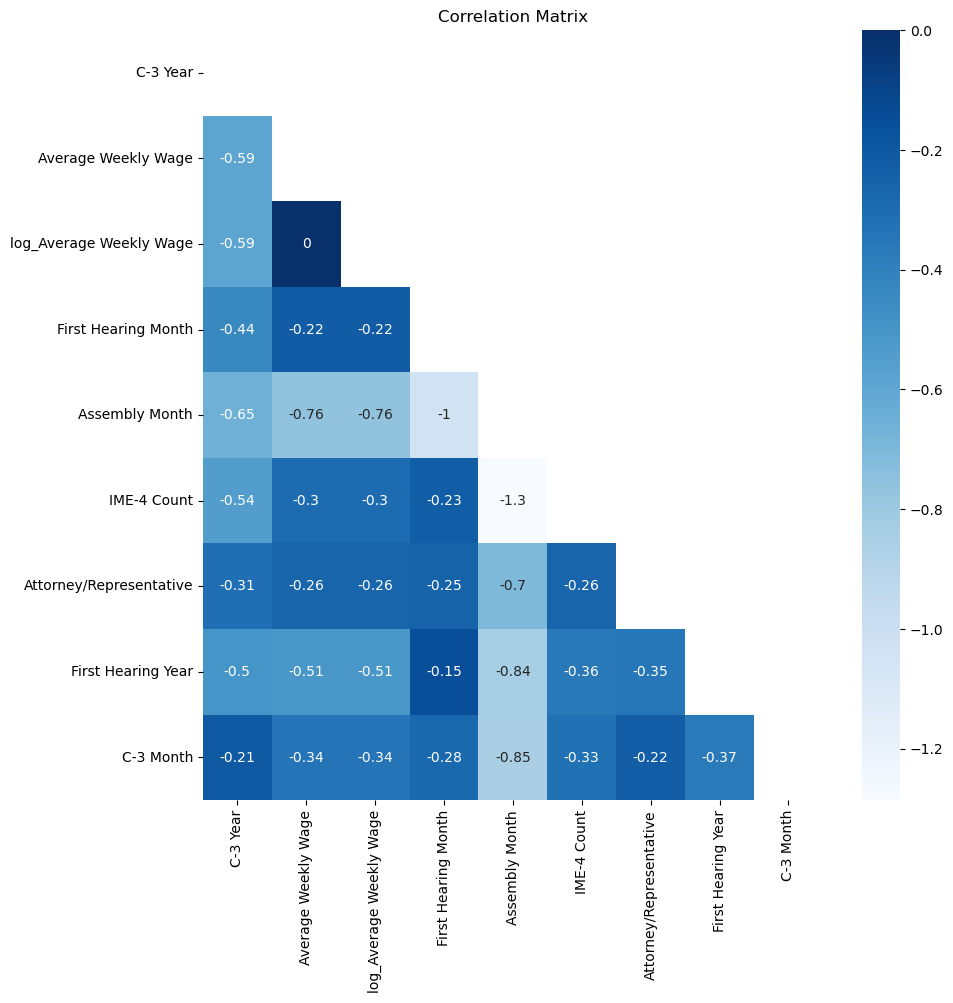

In [277]:
s_corr = leo.entropy_corr(df_train[bestnum])
#half of the matrix
mask = np.zeros_like(s_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 10))
sns.heatmap(s_corr, annot=True, cmap='Blues', mask=mask)
plt.title('Correlation Matrix')
plt.show()

### best featues level 2


In [ ]:
bestnum = ['C-3 Year',
 'Average Weekly Wage',
 'First Hearing Month',
 'Assembly Month',
 'IME-4 Count',
 'Attorney/Representative',
 'C-3 Month']

# smote and tomek

In [279]:
y_train.to_numpy(dtype=int)

array([2, 2, 2, ..., 3, 4, 2])

In [280]:
df_train_np = df_train[bestnum].to_numpy()
y_train_np = y_train.to_numpy(dtype=int)

In [281]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='auto')

# Ensure y_train contains integer values
y_train_int = y_train.round().astype('float64').to_numpy()
# Assuming you have your feature matrix X and target variable y
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(df_train_np, y_train_np)
df_train_resampled = pd.DataFrame(X_train_resampled, columns=bestnum)
y_train_resampled = pd.Series(y_train_resampled)

#smote = SMOTE(sampling_strategy='minority', random_state=42)

print("Resampling completed successfully!")

Resampling completed successfully!


In [282]:
y_train_resampled.value_counts()

2    232864
7    232636
1    232155
8    221613
3    205016
6    203528
5    184452
4    184014
Name: count, dtype: int64

# multiple model training

Accuracy: 0.5957179938330749
Precision: 0.4474739061242501
Recall: 0.5957179938330749
Accuracy: 0.6696601222932599
Precision: 0.6274970559960482
Recall: 0.6696601222932599
Accuracy: 0.680103827326098
Precision: 0.631289508661281
Recall: 0.680103827326098


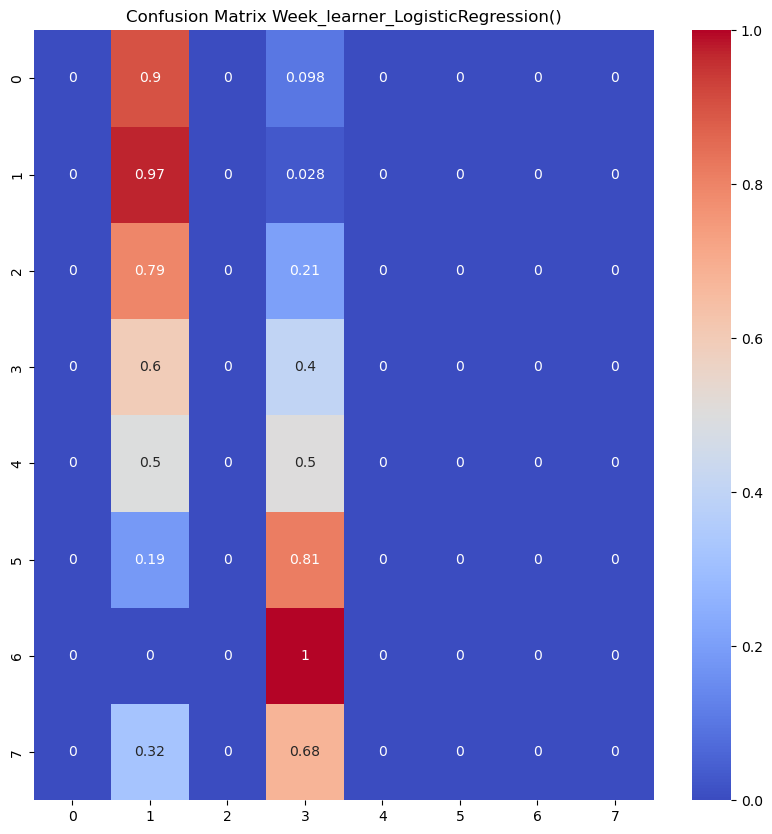

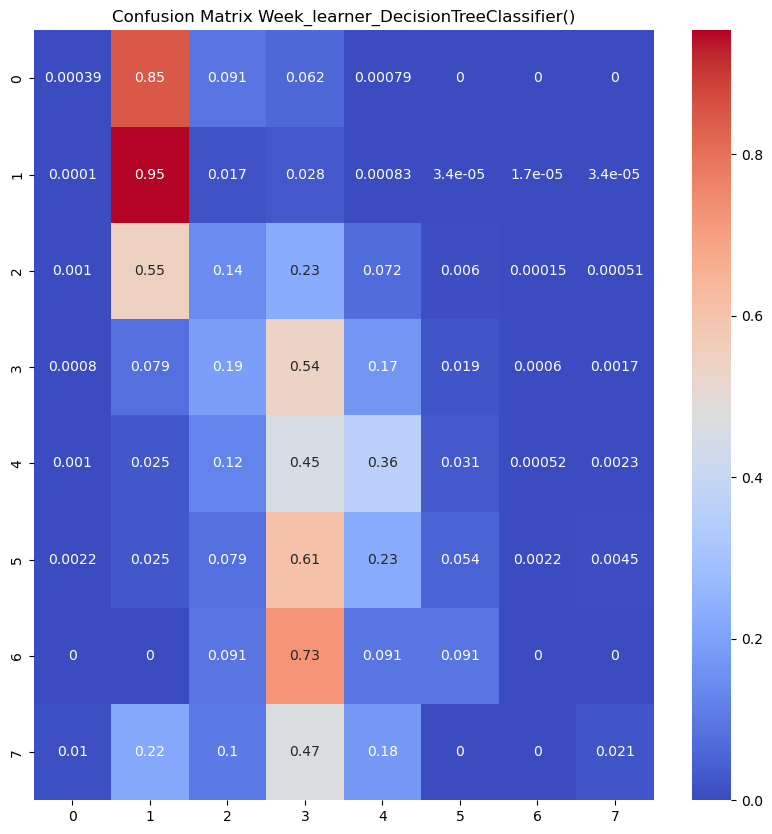

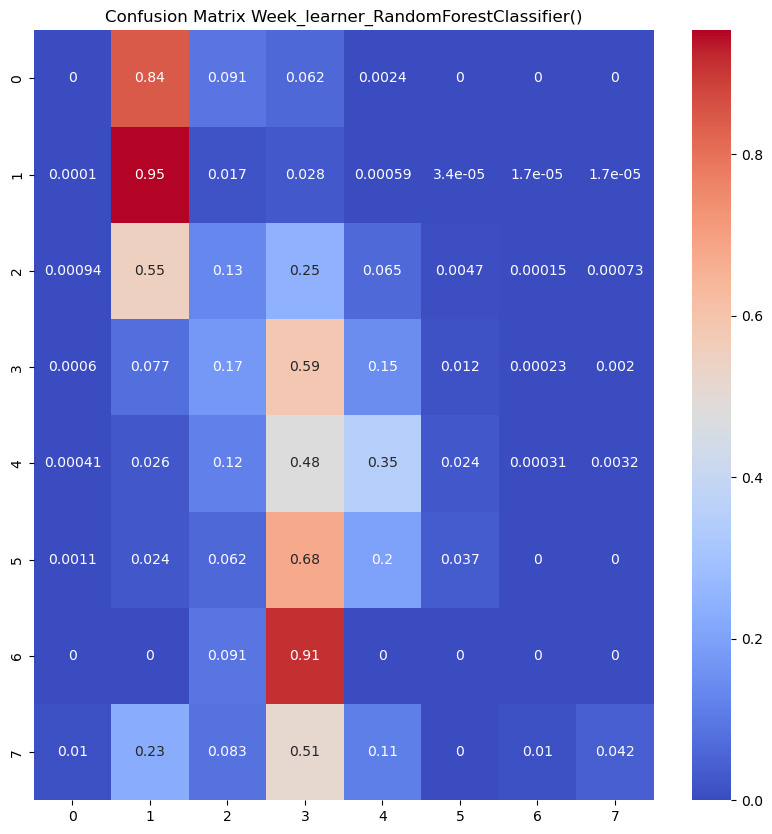

In [283]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# import RandomForest 
from sklearn.ensemble import RandomForestClassifier
# import histogram-based gradient boosting classification tree
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost
import lightgbm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


num_features_to_run = bestnum
# add the categorical features and the numerical features
num_cat_features_to_run = best_chi2 + bestnum

model_list_num = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]
model_list_num_cat = [lightgbm.LGBMClassifier()]
model_num_names = ['LogisticRegression', 'DecisionTree', 'RandomForest']
model_num_cat_names = ['LightGBM']
tn_list = []
fp_list = []
fn_list = []
tp_list = []

for model, model_name in zip(model_list_num, model_list_num):
    model.fit(df_train[num_features_to_run], y_train)
    y_pred = model.predict(df_valid[num_features_to_run])
    leo.report_and_save(model,f"Week_learner_{model_name}", y_pred, y_valid, num_features)
    cm = confusion_matrix(y_valid, y_pred,normalize='true')
    TN = cm[0][0]
    tn_list.append(TN)
    FP = cm[0][1]
    fp_list.append(FP)
    FN = cm[1][0]
    fn_list.append(FN)
    TP = cm[1][1]
    tp_list.append(TP)

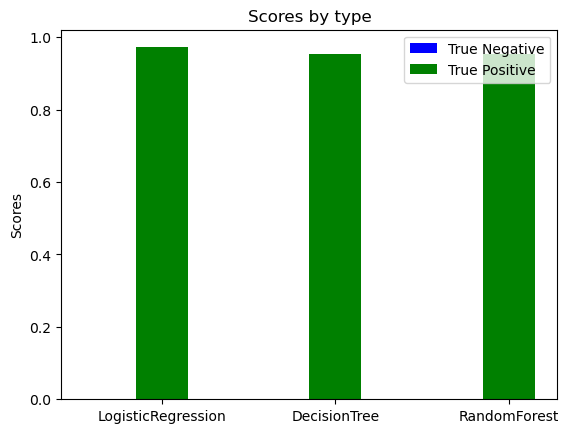

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
width = 0.3 # width of bar
x = np.arange(len(model_num_names))
ax.bar(x, tn_list, width, color='b', label='True Negative')
ax.bar(x + width, tp_list, width, color='g', label='True Positive')

ax.set_ylabel('Scores')
ax.set_title('Scores by type')

ax.set_xticks(x + width)
ax.set_xticklabels(model_num_names)
ax.legend()
plt.show()

# recursive feature elimination

Num Features: 3
Selected Features: ['Zip Code' 'Average Weekly Wage' 'log_Average Weekly Wage']
Feature Ranking: [34  5 33  1  9 18 27 26 30  6  1 14 13  8  7 11  3 17  1 20 21 12  2 28
 29 23 25 22 24 31 32 19 16  4 10 15]
--------------------------------------------------
Num Features: 4
Selected Features: ['Zip Code' 'Age at Injury' 'Average Weekly Wage'
 'log_Average Weekly Wage']
Feature Ranking: [33  4 32  1  8 19 25 26 29  1  1 13 12 14  2 11  3 16  1 18 21 10  6 27
 28 20 24 22 23 30 31 17 15  5  9  7]
--------------------------------------------------
Num Features: 5
Selected Features: ['Zip Code' 'Age at Injury' 'Average Weekly Wage' 'WCIO Part Of Body Code'
 'log_Average Weekly Wage']
Feature Ranking: [32  3 31  1  6 18 24 25 28  1  1  4 10 13  5 11  1 16  1 17 20  9 12 26
 27 19 23 21 22 29 30 15 14  2  7  8]
--------------------------------------------------
Num Features: 6
Selected Features: ['Attorney/Representative' 'Zip Code' 'Age at Injury'
 'Average Weekly Wage' 'WCI

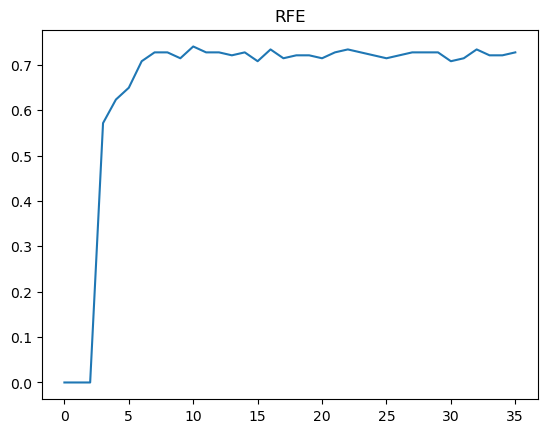

In [257]:
# import RFE
from sklearn.feature_selection import RFE
# import SelectKBest
from sklearn.feature_selection import SelectKBest,chi2, f_classif
# import SelectFromModel
from sklearn.feature_selection import SelectFromModel
features_to_RFE = num_features

X_small, X_big, y_small, y_big = train_test_split(df_train[features_to_RFE], y_train, test_size=0.2, random_state=0)
# create a base classifier used to evaluate a subset of attributes
model = RandomForestClassifier()
scores = np.zeros(len(features_to_RFE))
for numb_of_features in range( 3, len(features_to_RFE)):
    rfe_selector = RFE(estimator=model, n_features_to_select=numb_of_features)
    rfe_selector = rfe_selector.fit(X_small[features_to_RFE], y_small)
    print(f"Num Features: {rfe_selector.n_features_}")
    print(f"Selected Features: {np.array(features_to_RFE)[rfe_selector.support_]}")
    print(f"Feature Ranking: {rfe_selector.ranking_}")
    print("-"*50)
    scores[numb_of_features] = rfe_selector.score(X_big[features_to_RFE], y_big)
    
plt.plot(scores)
plt.title('RFE')
plt.show()


# grid search for hyperparameters

In [ ]:
# grid search fro best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Create the parameter grid based on the results of random search
param_grid_logistc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,5,6,7,8,9,10]
}


In [ ]:
# grid search for logistic regression

grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid_logistc,
                cv = 3, n_jobs = -1, verbose = 2)   